#### Data Loading

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Install the Kaggle library
!pip install kaggle

# Upload kaggle.json file
from google.colab import files
files.upload()  # This will prompt you to upload kaggle.json

# Make a directory for Kaggle and move the file there
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Now you can download the dataset
!kaggle datasets download -d ealaxi/paysim1 -p /content/datasets --unzip

print("Dataset downloaded to: /content/datasets")

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/ealaxi/paysim1
License(s): CC-BY-SA-4.0
 90% 160M/178M [00:02<00:00, 90.9MB/s]
100% 178M/178M [00:02<00:00, 77.3MB/s]
Dataset downloaded to: /content/datasets


In [ ]:
df=pd.read_csv("/content/datasets/PS_20174392719_1491204439457_log.csv",delimiter=',')

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
nRowsRead = 1000000

big_df = pd.read_csv("/content/datasets/PS_20174392719_1491204439457_log.csv",delimiter=',',nrows=nRowsRead)

In [ ]:
big_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
999995,45,PAYMENT,10913.42,C1384914558,576108.80,565195.38,M166797080,0.0,0.0,0,0
999996,45,PAYMENT,2014.46,C1207593845,565195.38,563180.92,M1027899613,0.0,0.0,0,0
999997,45,PAYMENT,18839.45,C260638437,563180.92,544341.47,M243388883,0.0,0.0,0,0
999998,45,PAYMENT,17890.19,C439661237,544341.47,526451.29,M66034502,0.0,0.0,0,0


In [ ]:
nRowsRead = 100000
small_df = pd.read_csv("/content/datasets/PS_20174392719_1491204439457_log.csv",delimiter=',',nrows=nRowsRead)
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


#### Functions

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

def prepare_data_for_training(df, target_column='isFraud', sampling_ratio=95/5, top_features=None, test_size=0.2, random_state=42):
    """
    Prepares a dataset for training by balancing classes, selecting features, scaling, and splitting into train and test sets.

    Parameters:
        df (pd.DataFrame): The original dataset.
        target_column (str): The target column for classification.
        sampling_ratio (float): The ratio of non-fraud to fraud samples. Default is 95:5.
        top_features (list): List of top features to keep based on feature importance.
        test_size (float): The proportion of the dataset to include in the test split.
        random_state (int): The random seed for reproducibility.

    Returns:
        X_train, X_test, y_train, y_test: Prepared training and testing datasets.
    """

    print(df.shape)

    # Separate fraud and non-fraud transactions
    fraud_df = df[df[target_column] == 1]
    non_fraud_df = df[df[target_column] == 0]

    # Check the size of fraud and non-fraud subsets
    print("Size of fraud and non-fraud datasets:")
    print("Fraud:", fraud_df.shape, "Length of fraud_df:", len(fraud_df))
    print("Non-Fraud:", non_fraud_df.shape, "Length of non_fraud_df:", len(non_fraud_df))

    # Calculate the number of non-fraud samples needed for the specified ratio
    desired_non_fraud_count = int(len(fraud_df) * sampling_ratio)

    # Randomly sample the non-fraud data to the desired count
    non_fraud_sampled = non_fraud_df.sample(n=desired_non_fraud_count, random_state=random_state)

    # Concatenate fraud and sampled non-fraud data and shuffle
    balanced_df = pd.concat([fraud_df, non_fraud_sampled])
    balanced_df = balanced_df.sample(frac=1, random_state=random_state).reset_index(drop=True)

    print("-The balanced dataset now has shape of : ", balanced_df.shape)
    print(print("The amount of Fraud Transaction in the Balanced Dataset is: ",df[df[target_column] == 1].shape))


    # Print the class balance in the dataset
    print("Class balance after sampling:")
    balanced_df[target_column].value_counts(normalize=True) * 100


    # One-hot encode categorical columns
    X = pd.get_dummies(balanced_df, columns=['type'])

    # Remove columns containing 'name'
    X = X.loc[:, ~X.columns.str.contains('name')]

    # Convert all columns to int (optional if required by your dataset)
    X = X.astype(int)

    # Separate target and features
    y = X[target_column]
    X = X.drop(columns=[target_column])

    # Feature selection using RandomForest
    model = RandomForestClassifier(random_state=random_state)
    model.fit(X, y)

    importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

    print("Top 10 features based on importance:")
    print(feature_importance_df.head(10))

    # Select top features if provided; otherwise, use default top 5
    if top_features is None:
        top_features = feature_importance_df['feature'].head(3).tolist()

    X_top = X[top_features]

    # Scale the selected features
    scaler = StandardScaler()
    X_top = scaler.fit_transform(X_top)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=test_size, random_state=random_state)

    # Print the sizes of the train and test sets
    print("Training set size:", X_train.shape, y_train.shape)
    print("Testing set size:", X_test.shape, y_test.shape)

    return X_train, X_test, y_train, y_test


THe following functions are written in order for us to understand deeper the nameOrig and nameDest columns:

In [ ]:
import pandas as pd

# Assuming the data is loaded into a DataFrame called `df`

# 1. Basic Summary Statistics
def basic_summary(df):
    print("Basic Summary Statistics:")
    print("Unique nameOrig:", df['nameOrig'].nunique())
    print("Unique nameDest:", df['nameDest'].nunique())
    print("Null values in nameOrig:", df['nameOrig'].isnull().sum())
    print("Null values in nameDest:", df['nameDest'].isnull().sum())

# 3. Frequency Analysis
def frequency_analysis(df):
    print("\nFrequency Analysis:")
    nameOrig_freq = df['nameOrig'].value_counts().head(10)
    nameDest_freq = df['nameDest'].value_counts().head(10)

    print("Top 10 most frequent nameOrig values:\n", nameOrig_freq)
    print("Top 10 most frequent nameDest values:\n", nameDest_freq)

# 4. Transaction Types per Account
def transaction_types_analysis(df):
    print("\nTransaction Types per Account:")

    nameOrig_type_counts = df.groupby('nameOrig')['type'].value_counts().unstack().fillna(0)
    nameDest_type_counts = df.groupby('nameDest')['type'].value_counts().unstack().fillna(0)

    print("Transaction types associated with nameOrig (sample):\n", nameOrig_type_counts.head(10))
    print("Transaction types associated with nameDest (sample):\n", nameDest_type_counts.head(10))

In [ ]:
import pandas as pd
import warnings

def count_initial_letters(df, orig_col='nameOrig', dest_col='nameDest'):
    """
    Count the occurrences of each initial letter in the specified name columns.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    orig_col (str): The column name for the origin names (default is 'nameOrig').
    dest_col (str): The column name for the destination names (default is 'nameDest').

    Returns:
    pd.DataFrame: A DataFrame with counts of each initial letter in both columns.
    """
    # Suppress warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        # Extract the first letter of each value in the specified columns
        df['first_letter_orig'] = df[orig_col].str[0]
        df['first_letter_dest'] = df[dest_col].str[0]

        # Count the occurrences of each letter in both columns
        orig_counts = df['first_letter_orig'].value_counts()
        dest_counts = df['first_letter_dest'].value_counts()

        # Combine the counts into a single DataFrame for easier comparison
        letter_counts = pd.DataFrame({'nameOrig': orig_counts, 'nameDest': dest_counts}).fillna(0).astype(int)

        # Drop the temporary columns
        df.drop(columns=['first_letter_orig', 'first_letter_dest'], inplace=True)

    return letter_counts

In [ ]:
def count_fraud_percentage(df, fraud_col='isFraud'):
    """
    Calculate the count and percentage of fraud cases in a DataFrame.

    """

    fraud_count = df[fraud_col].sum()

    total_count = len(df)
    fraud_percentage = (fraud_count / total_count) * 100

    return fraud_count, fraud_percentage


In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

from imblearn.over_sampling import SMOTE
import pandas as pd

def balance_with_smote(df, target_col='isFraud', smote_ratio=0.2, random_state=42):
    """Apply SMOTE to increase the minority class size by a specified ratio."""
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Apply SMOTE with a limited ratio
    smote = SMOTE(sampling_strategy=smote_ratio, random_state=random_state)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
    balanced_df[target_col] = y_resampled
    return balanced_df

## Data Processing

In [ ]:
# Find the size of the DataFrame
df_size = df.shape
print("Number of rows:", df_size[0])
print("Number of columns:", df_size[1])

Number of rows: 6362620
Number of columns: 11


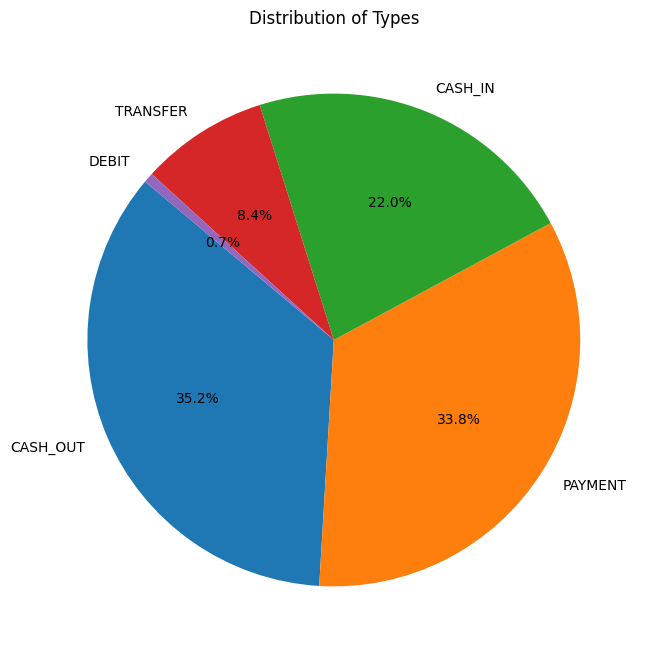

In [ ]:
type_counts = df['type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Types')
plt.show()

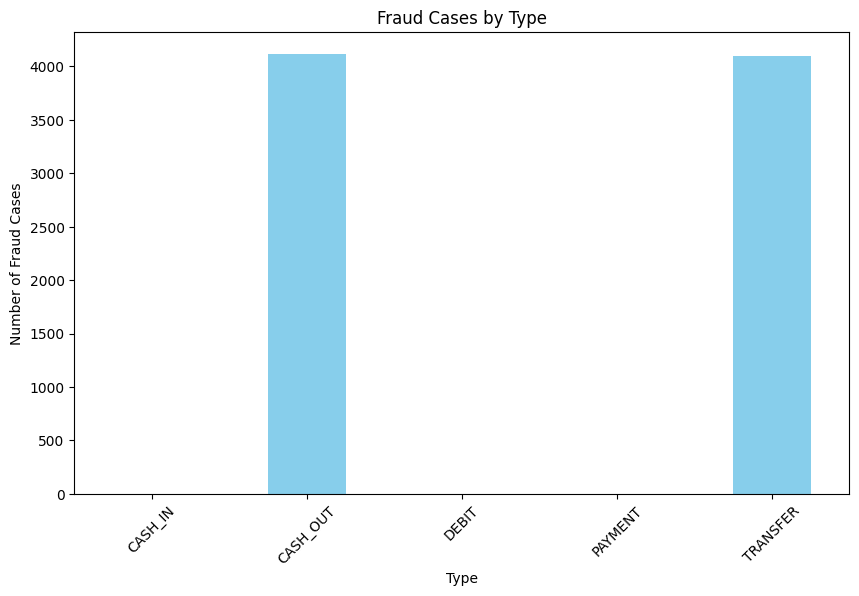

In [ ]:
import matplotlib.pyplot as plt

# Group by 'type' and 'isfraud' to get counts of fraud cases per type
type_fraud_counts = df.groupby('type')['isFraud'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
type_fraud_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Type')
plt.ylabel('Number of Fraud Cases')
plt.title('Fraud Cases by Type')
plt.xticks(rotation=45)
plt.show()

The dataset is around 6 million transactions and in all these transaction we find actual fraud (isFraud==1) in only the categories where the type is either CASH_OUT or TRANSFER.

So we can generalize and remove the rows that have as a type something different than CASH_OUT or TRANSFER.



In [ ]:
# Select only the numerical columns
numeric_df = df.select_dtypes(include=[float, int])

# Now compute the correlation
correlation = numeric_df.corr()

# Print sorted correlation values with 'isFraud'
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


In [ ]:
amount_range = (df['amount'].min(), df['amount'].max())
print("\nRange of 'amount' Column (Min, Max):", amount_range)


Range of 'amount' Column (Min, Max): (0.0, 92445516.64)


In [ ]:
print(df['isFraud'].value_counts(normalize=True) * 100)

isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


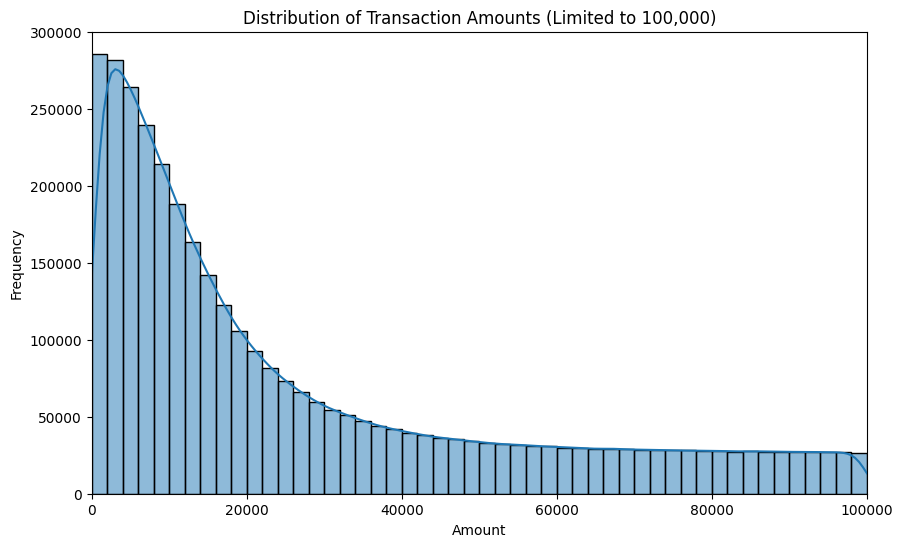

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['amount'] <= 100000]['amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts (Limited to 100,000)")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.xlim(0, 100000)  # Set the limit for the x-axis
plt.show()

In [ ]:
# Separate fraud and non-fraud transactions
fraud_df = df[df['isFraud'] == 1]
non_fraud_df = df[df['isFraud'] == 0]

In [ ]:
print(fraud_df.shape)

(8213, 11)


Now we aim to learn a bit more things about the nameOrig and the nameDest.



-----------------------------------------------------------

In [ ]:
result = count_initial_letters(df)
print(result)

   nameOrig  nameDest
C   6362620   4211125
M         0   2151495


In [ ]:
basic_summary(df)
frequency_analysis(df)

Basic Summary Statistics:
Unique nameOrig: 6353307
Unique nameDest: 2722362
Null values in nameOrig: 0
Null values in nameDest: 0

Frequency Analysis:
Top 10 most frequent nameOrig values:
 nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64
Top 10 most frequent nameDest values:
 nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64


In [ ]:
import pandas as pd
pattern = r'^[A-Za-z]\d+$'

nameOrig_matches = df['nameOrig'].str.match(pattern)
nameDest_matches = df['nameDest'].str.match(pattern)

all_nameOrig_valid = nameOrig_matches.all()
all_nameDest_valid = nameDest_matches.all()

print("All nameOrig values match the pattern (letter followed by digits):", all_nameOrig_valid)
print("All nameDest values match the pattern (letter followed by digits):", all_nameDest_valid)

if not all_nameOrig_valid:
    print("Rows with invalid nameOrig values:\n", df[~nameOrig_matches])

if not all_nameDest_valid:
    print("Rows with invalid nameDest values:\n", df[~nameDest_matches])

All nameOrig values match the pattern (letter followed by digits): True
All nameDest values match the pattern (letter followed by digits): True


In the above cell we proved that everyname starts with a letter distinguishing them to different classes. Also in our preprocessing we have showed that there are only two kinds of classes 'C' and 'M'

#### Balancing the unbalanced dataset

In [ ]:
# # Calculate the number of non-fraud samples needed for a 95:5 ratio
# desired_non_fraud_count = int(len(fraud_df) * (95 / 5))

# # Randomly sample the non-fraud data to the desired count
# non_fraud_sampled = non_fraud_df.sample(n=desired_non_fraud_count, random_state=42)

In [ ]:
# balanced_df = pd.concat([fraud_df, non_fraud_sampled])

In [ ]:
# balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
# print(balanced_df['isFraud'].value_counts(normalize=True) * 100)

isFraud
0    95.0
1     5.0
Name: proportion, dtype: float64


### Data Cleaning

In [ ]:
df_cleaned = df.loc[(df['type'].isin(['CASH_OUT', 'TRANSFER'])),:]

In [ ]:
df_cleaned.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [ ]:
df_cleaned.shape

(2770409, 11)

In [ ]:
result = count_initial_letters(df_cleaned)
print(result)

   nameOrig  nameDest
C   2770409   2770409


In [ ]:
fraud_count, fraud_percentage = count_fraud_percentage(df_cleaned)
print(f"Fraudulent Transactions: {fraud_count}")
print(f"Fraud Percentage: {fraud_percentage:.2f}%")

Fraudulent Transactions: 8213
Fraud Percentage: 0.30%


In [ ]:
basic_summary(df_cleaned)
frequency_analysis(df_cleaned)

Basic Summary Statistics:
Unique nameOrig: 2768630
Unique nameDest: 509565
Null values in nameOrig: 0
Null values in nameDest: 0

Frequency Analysis:
Top 10 most frequent nameOrig values:
 nameOrig
C724452879     3
C2098525306    3
C1902386530    3
C415371198     2
C1837511542    2
C1048374464    2
C261533385     2
C1608458049    2
C1132553143    2
C1519888053    2
Name: count, dtype: int64
Top 10 most frequent nameDest values:
 nameDest
C1286084959    75
C665576141     68
C1360767589    68
C97730845      67
C248609774     64
C2083562754    63
C2006081398    63
C1789550256    62
C1590550415    62
C985934102     61
Name: count, dtype: int64


What we see here is that when the type is cash_out or transfer, both the nameOrig and nameDest are customer-like name.

Also we see that no name is repeated enough times to stand out (highest frequency is 100/270000 which is too small to care about individual names.

So we can conclude that fraud is happening when there are transactions of type CASH_OUT or TRANSFER between customers.

In [ ]:
df_cleaned

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [ ]:
df_cleaned.drop(columns=['nameOrig','nameDest','isFlaggedFraud'],inplace=True)

<ipython-input-35-c11001ea31b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['nameOrig','nameDest','isFlaggedFraud'],inplace=True)


In [ ]:
df_cleaned['type'] = df['type'].map({'CASH_OUT': 0, 'TRANSFER': 1})

<ipython-input-36-bea57b83b8c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['type'] = df['type'].map({'CASH_OUT': 0, 'TRANSFER': 1})


In [ ]:
df_smote_balanced = balance_with_smote(df_cleaned, target_col='isFraud', smote_ratio=0.25, random_state=42)
fraud_count_smote, fraud_percentage_smote = count_fraud_percentage(df_smote_balanced)
print(f"After SMOTE - Fraudulent: {fraud_count_smote}, Fraud Percentage: {fraud_percentage_smote:.2f}%")

After SMOTE - Fraudulent: 690549, Fraud Percentage: 20.00%


In [ ]:
df_cleaned_balanced=df_smote_balanced

For balancing the unbalanced dataset some good methodologies are:

- SMOTE undersampling

- Ensemble method

- K-Fold-Validation

### Quick simple SVM for seeing the quality of the new dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Assuming df and df_cleaned have an 'isFraud' column as the target variable

def train_svm(df, target_col='isFraud'):
    """Train and evaluate an SVM with a linear kernel on the provided dataset."""
    # 1. Separate features and target
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # 2. Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # 3. Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 4. Train the SVM model with a linear kernel
    svm_model = SVC(kernel='linear', random_state=42)
    svm_model.fit(X_train_scaled, y_train)

    # 5. Make predictions
    y_pred = svm_model.predict(X_test_scaled)

    # 6. Calculate accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    return accuracy, class_report

In [ ]:
original_size = len(df_cleaned_balanced)
sample_size = max(1, original_size // 100)  # Ensure at least 1 row is selected
df_small = df_cleaned_balanced.sample(n=sample_size, random_state=42)

print(f"Original size: {original_size}")
print(f"New size (1000 times smaller): {len(df_small)}")
print(count_fraud_percentage(df_small))

Original size: 3452745
New size (1000 times smaller): 34527
(6972, 20.192892518898255)


In [ ]:
accuracy_df_cleaned, report_df_cleaned = train_svm(df_small)
print(f"Accuracy on cleaned df_cleaned dataset: {accuracy_df_cleaned:.2f}")
print("Classification Report for cleaned df_cleaned dataset:\n", report_df_cleaned)

Accuracy on cleaned df_cleaned dataset: 0.95
Classification Report for cleaned df_cleaned dataset:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      8338
           1       0.94      0.79      0.86      2021

    accuracy                           0.95     10359
   macro avg       0.95      0.89      0.91     10359
weighted avg       0.95      0.95      0.95     10359



#### Quantum SVC

THis has no place here cause this is the data analysis notebook, it is just for a quick testing of the new analysis

In [ ]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 9.8 MB/s eta 0:00:00


In [ ]:
pip install qiskit_machine_learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 14.3 MB/s eta 0:00:00
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512553 sha256=95c782c717291396af653ac22585a317678e18b4edfd287127436c5a476e4bf0
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def prepare_data(df, target_col='isFraud', test_size=0.3, random_state=42):
    X = df.drop(columns=[target_col])
    y = df[target_col]

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test


In [ ]:
original_size = len(df_small)
sample_size = max(1, original_size // 10)  # Ensure at least 1 row is selected
df_smaller = df_small.sample(n=sample_size, random_state=42)

print(f"Original size: {original_size}")
print(f"New size (1000 times smaller): {len(df_smaller)}")
print(count_fraud_percentage(df_smaller))

Original size: 34527
New size (1000 times smaller): 3452
(683, 19.785631517960603)


In [ ]:
df_smaller.reset_index(drop=True, inplace=True)
X_train, X_test, y_train, y_test = prepare_data(df_smaller)
y_train = y_train.values  # Converts y_train from a Series to a NumPy array

In [ ]:
num_qubits=X_train.shape[1]
tau = 50
C = 0.5

print(num_qubits,tau,C)

7 50 0.5


In [ ]:
from qiskit.circuit.library import ZZFeatureMap,ZFeatureMap
from qiskit_algorithms.utils import algorithm_globals

from qiskit_machine_learning.kernels import FidelityQuantumKernel


algorithm_globals.random_seed = 12345

feature_map = ZFeatureMap(feature_dimension=X_train.shape[1], reps=2)

qkernel = FidelityQuantumKernel(feature_map=feature_map)

In [ ]:
print(type(X_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
from qiskit_machine_learning.algorithms import PegasosQSVC

pegasos_qsvc = PegasosQSVC(quantum_kernel=qkernel, C=C, num_steps=tau)

# training
pegasos_qsvc.fit(X_train, y_train)

# testing
# pegasos_score = pegasos_qsvc.score(X_test,y_test)
# print(f"PegasosQSVC classification test score: {pegasos_score}")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Step 1: Make predictions on the test set
y_pred = pegasos_qsvc.predict(X_test)

# Step 2: Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Step 3: Compute classification metrics
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Step 4: Full classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[848   0]
 [188   0]]
Accuracy: 0.8185
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       848
           1       0.00      0.00      0.00       188

    accuracy                           0.82      1036
   macro avg       0.41      0.50      0.45      1036
weighted avg       0.67      0.82      0.74      1036



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

### References



https://github.com/rmj3197/Detection-of-Fraud-in-Financial-Transactions/blob/master/Detection%20of%20Fraud%20in%20Financial%20Transactions%20Report.pdf


https://medium.com/game-of-bits/how-to-deal-with-imbalanced-data-in-classification-bd03cfc66066

How to use Ensemble Methods to tackle the unbalanced/undersampled dataset:
https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html
